In [1]:
import tensorflow as tf
from flows import NormalRW, DFlow, ResFlow, NVPFlow, phase, Normal, Linear, CFlow, FlowSequence
from flows.config import floatX
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow.contrib.distributions import WishartCholesky, WishartFull


np.random.seed(1234)

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
df = tf.placeholder(tf.int64)
mat = tf.placeholder(tf.float32, [4,4])
pmat = tf.diag([100.]*4)/tf.cast(df, tf.float32)
cov_prior = WishartFull(tf.cast(df,tf.float32), pmat)
lp = cov_prior.log_prob(mat)

In [3]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [4]:
def f(x, d):
    x = np.diag([x**2]*4).astype('float32')
    return sess.run(lp, {mat:x, df:d})

In [19]:
ret = [f(x, 6) for x in np.arange(0.01, 20, 0.1)]

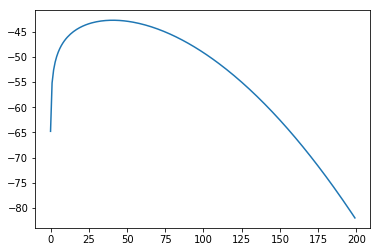

In [20]:
plt.plot(ret)
plt.show()

In [14]:
sent = 'this'
dic = {x:i for i,x in enumerate(sorted(set(sent)))}
rev_dic = {i:x for x,i in dic.items()}
emb = np.diag(np.ones(len(dic)))
forward_lookup = np.array([emb[dic[x]] for x in sent]).astype('bool')

np_dic = np.array([[i for i in range(len(dic))] for _ in range(len(sent))])

In [15]:
np_dic[forward_lookup]

array([3, 0, 1, 2])

In [16]:
decoded = [rev_dic[i] for i in np_dic[forward_lookup]]
''.join(decoded)

'this'